In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from astropy.table import Table
#from matplotlib import style
from collections import Counter
#style.use('fivethirtyeight')

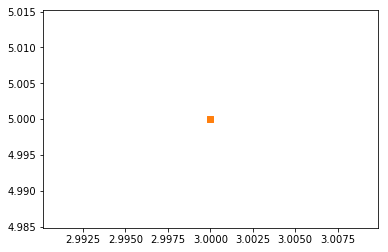

In [3]:
plt.scatter(3,5,marker='s')
plt.show()

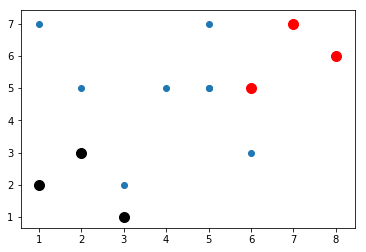

In [7]:
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features = [[5,7],[3,2],[6,3],[1,7],[2,5],[5,5],[4,5],[5,5]]
new_features=np.array(new_features)
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[:,0],new_features[:,1])
#plt.scatter(new_features[0],new_features[1])
plt.show()



In [4]:
t = Table.read('vizier_votable.vot', format='votable')
print(t.colnames)

RA = t['_RAJ2000']
DEC = t['_DEJ2000']


['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


In [8]:
def nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_dist, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

coords = np.array([RA,DEC])
for test in coords:
    result = nearest_neighbors(dataset, coords[test],k=3)
    print(result)
    plt.scatter(coords[test,0],coords[test,1], color=result)
    
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]

plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices



array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [5]:
from scipy import spatial
from scipy.spatial import KDTree

test_data = [np.random.rand(20),np.random.rand(20)]
print(test_data)

test_data = np.array(test_data)

X, Y = np.meshgrid(test_data[:,0],test_data[:,1])

print(X,Y)

tree = spatial.KDTree(zip(test_data[:,0],test_data[:,1]))


[array([ 0.97813244,  0.17381522,  0.30239178,  0.87584769,  0.84661369,
        0.95413892,  0.21460233,  0.65361219,  0.91686211,  0.42965842,
        0.97615483,  0.95122075,  0.29673683,  0.82333339,  0.13392003,
        0.76402068,  0.27148871,  0.70025314,  0.00639846,  0.4409282 ]), array([ 0.68723559,  0.74136323,  0.07643911,  0.14163638,  0.01478402,
        0.89756997,  0.95574345,  0.15618832,  0.15763213,  0.75812568,
        0.41212933,  0.11575808,  0.35548038,  0.32880476,  0.87604535,
        0.03121314,  0.00490815,  0.75064092,  0.0688456 ,  0.93257978])]
[[ 0.97813244  0.68723559]
 [ 0.97813244  0.68723559]] [[ 0.17381522  0.17381522]
 [ 0.74136323  0.74136323]]


ValueError: not enough values to unpack (expected 2, got 0)

In [84]:
from scipy import spatial
from scipy.spatial import KDTree

def KDneighbor(array):
    tree = KDTree(array,100000)
    dist, ind = tree.query(array[len(array)-1], k=7)
    return(dist[5])

In [117]:
import numpy as np
import copy
import time

start = time.time()
data = np.random.random((40, 2))  

print(data[0])
N = 50
xgrid = np.linspace(0,1,N)
ygrid = np.linspace(0,1,N)
X, Y = np.meshgrid(xgrid,ygrid)
plt.scatter(X,Y,marker='s',s=30.0)

X = np.array(X)
Y = np.array(Y)

array = [X[1,0:len(Y)],Y[2,0:len(X)]]
array = np.array(array)
Xvalues = (array[0,0:len(array[1])])
test_array = []
count = 0
yval = 0 - (X[0,13]-X[0,12])
time2 = time.time()
for x in range(len(X[0])):
    for i in (Xvalues):
        if(x == 0):
            test_array.append([i,0])
        test_array.append([i,(yval-((1+x)*yval))])
end2 = time.time() 
test_array = np.array(test_array)

#print(Y[6])
#for y in 
allDists = []
# for j in range(len(Y)):
#     distArray = []
#     Yval = Y[j-1,0]
#     if(j > 0):
#         test_array[test_array == Yval] = Y[j,0]
#         print('\nTest_Array\n',test_array)
#     for i in range(len(test_array)):
#         dat = []
#         dat = copy.copy(data)
#         #dat.append(test_array[i])
#         #dat = np.concatenate((dat,test_array[i]),axis=0)
#         dat = np.vstack((dat,test_array[i]))
#         tree = KDTree(dat,2)
#         dist, ind = tree.query(dat[len(dat)-1], k=3)
#         distArray.append(dist[1])
#     allDists.append(distArray)
time1 = time.time()
# for i in range(len(test_array)):
#         dat = []
#         dat = copy.copy(data)
#         #dat.append(test_array[i])
#         #dat = np.concatenate((dat,test_array[i]),axis=0)
#         dat = np.vstack((dat,test_array[i]))
#         tree = KDTree(dat,50)
# #         dist, ind = tree.query(dat[len(dat)-1], k=7)
#         dist, ind = tree.query(dat, k=7)
#         distArray.append(dist[5])
dat = copy.copy(data)
#dat = vstack(dat)

# The Following Line of Code creates a 1D array with every nearest neighbor value
#distArray = list(map((lambda x: KDneighbor(np.vstack((dat,x)))), test_array))
#print('Length of distArray:', len(distArray))

# *********************************
# ****CURRENT AREA OF WORK*********
# *********************************

XY = [X,Y]
XY = np.transpose(XY)
XYcoords = XY[0]
for j in range(1,len(XY)):
    XYcoords = np.vstack((XYcoords,XY[j]))
print(len(XY),len(XYcoords))
print(test_array)
tree = KDTree(data,1000)
dist = tree.query(test_array,k=7)
print('Length of dist',len(dist[0]))

# *********************************
# ****CURRENT AREA OF WORK*********
# *********************************

distArray = []
# for i in range(len(dist)):
#     distArray.append(dist[5])

distArray = np.array(distArray)
print(distArray.shape)
#print(len(XYcoords[0]))

distArray = np.reshape(distArray,(-1,N))
print('TESTING',len(distArray[100]),len(distArray))
#distArray = np.delete(distArray, 100,0)
#print('TESTING',len(distArray[100]),len(distArray))
end1 = time.time()  
print('Total Time(s):', (end1-time1))
#print('Length of DistArray:', distArray)
test_array = np.array(test_array)


plt.scatter(test_array[:,0]*N,test_array[:,1]*N,marker='s',c=distArray,cmap="gray")
plt.colorbar()
plt.contour((distArray))
plt.colorbar()
plt.scatter(data[:,0],data[:,1],s=8.0,c='orange')
plt.show()

print(len(distArray))
end = time.time()

print(len(distArray))
print('For loop time:', end2 - time2)
print('\n\nfinalDist: ', finalDist.size)
print(finalDist.shape,'\n\n',len(finalDist))

[ 0.82990452  0.75406461]
50 2500
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.02040816  0.        ]
 ..., 
 [ 0.95918367  1.        ]
 [ 0.97959184  1.        ]
 [ 1.          1.        ]]
Length of dist 2550
(0,)


IndexError: index 100 is out of bounds for axis 0 with size 0

In [114]:
B = [X,Y]
B = np.transpose(B)
XY = B[0]
for j in range(1,len(B)):
    XY = np.vstack((XY,B[j]))
print(len(B))
print((XY[]))

50
[ 0.02040816  0.6122449 ]


In [10]:
A = np.array([1,2,3,4,5,6,7,8])
B = np.reshape(distArray, (-1, 2))
print(B[0])


[ 0.24985213  0.24985213]


In [352]:
distArray = []
# for i in range(len(test_array)):
#         dat = []
#         dat = copy.copy(data)
#         #dat.append(test_array[i])
#         #dat = np.concatenate((dat,test_array[i]),axis=0)
#         dat = np.vstack((dat,test_array[i]))
#         tree = KDTree(dat,2)
#         dist, ind = tree.query(dat[len(dat)-1], k=7)
#         distArray.append(dist[3])
    

#testDat = [data,test_array]
testDat = np.vstack((data,test_array))
#tree = KDTree(testDat,10)
tree = KDTree(test_array,2)
dist, ind = tree.query(data,k=6)
print(ind[0])
print(dist[0])
print(testDat[4566])
print(testDat[0])
print(data[0])
# print(len(test_array),len(data),len(testDat))
# print(testDat[501:506])
# print(ind[300])
dist_array = []
for i in range(len(dist)):
    dist_array.append(dist[i][3])
print(len(dist_array))
# plt.scatter(testDat[:,0],testDat[:,1], c = dist_array)
# plt.show()
# #test_array = np.array(test_array)
# plt.scatter(test_array[:,0],test_array[:,1],marker='s',c=dist_array)
# plt.colorbar()
# plt.scatter(data[:,0],data[:,1],c='w')
# plt.show()
# print(len(distArray))

[4466 4465 4366 4566 4467 4365]
[ 0.00209189  0.00806909  0.00987068  0.01074163  0.0121533   0.01257635]
[ 0.66666667  0.43434343]
[ 0.6646225   0.43389912]
[ 0.6646225   0.43389912]
100


In [301]:
test_array = []
for x in range(len(X)):
    for i in (Xvalues):
        if(x == 0):
            test_array.append([i,0])
        test_array.append([i,(yval-((1+x)*yval))])
print(test_array[138])
print(X[0])

[1.0, 0]
[ 0.          0.01449275  0.02898551  0.04347826  0.05797101  0.07246377
  0.08695652  0.10144928  0.11594203  0.13043478  0.14492754  0.15942029
  0.17391304  0.1884058   0.20289855  0.2173913   0.23188406  0.24637681
  0.26086957  0.27536232  0.28985507  0.30434783  0.31884058  0.33333333
  0.34782609  0.36231884  0.37681159  0.39130435  0.4057971   0.42028986
  0.43478261  0.44927536  0.46376812  0.47826087  0.49275362  0.50724638
  0.52173913  0.53623188  0.55072464  0.56521739  0.57971014  0.5942029
  0.60869565  0.62318841  0.63768116  0.65217391  0.66666667  0.68115942
  0.69565217  0.71014493  0.72463768  0.73913043  0.75362319  0.76811594
  0.7826087   0.79710145  0.8115942   0.82608696  0.84057971  0.85507246
  0.86956522  0.88405797  0.89855072  0.91304348  0.92753623  0.94202899
  0.95652174  0.97101449  0.98550725  1.        ]


In [53]:
#testing Cell

a = np.random.random((100000,1))
b = []
time1 = time.time()
for i in a:
    b = np.append(b,i)
end1 = time.time()
print(b[0:5])

time2 = time.time()
c = list(map((lambda x: x), a))
end2 = time.time()
c = np.array(c)
print(c[0:5])

print('time1: ',end1-time1)
print('time2: ',end2-time2)

[ 0.81423611  0.55391823  0.68867785  0.17154147  0.85741169]
[[ 0.81423611]
 [ 0.55391823]
 [ 0.68867785]
 [ 0.17154147]
 [ 0.85741169]]
time1:  5.78012752532959
time2:  0.06602883338928223


In [104]:
v = np.array([[1,1],[2,2],[3,3]])
n = np.vstack((v,[4,4]))
print(n)

[[1 1]
 [2 2]
 [3 3]
 [4 4]]
